<a href="https://colab.research.google.com/github/FairozAhmadSheikh/DeepLearning_Bootcamp_with_Tensor_Flow/blob/main/05_transfer_learning_fine_tunning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lets start with importing some helper functions from a script

In [32]:
!wget  https://raw.githubusercontent.com/FairozAhmadSheikh/DeepLearning_Bootcamp_with_Tensor_Flow/refs/heads/main/helper_functions/helper_functions.py

--2025-09-19 03:49:21--  https://raw.githubusercontent.com/FairozAhmadSheikh/DeepLearning_Bootcamp_with_Tensor_Flow/refs/heads/main/helper_functions/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6733 (6.6K) [text/plain]
Saving to: ‘helper_functions.py.1’

helper_functions.py 100%[===================>]   6.58K  --.-KB/s    in 0s      

2025-09-19 03:49:21 (86.0 MB/s) - ‘helper_functions.py.1’ saved [6733/6733]



In [33]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip

--2025-09-19 03:49:21--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.253.118.207, 142.251.10.207, 142.251.12.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.253.118.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip.1’

10_food_classes_10_ 100%[===================>] 160.74M  22.5MB/s    in 8.1s    

2025-09-19 03:49:30 (19.9 MB/s) - ‘10_food_classes_10_percent.zip.1’ saved [168546183/168546183]



In [34]:
from helper_functions import unzip_data,walk_through_dir,plot_loss_curves,create_tensorboard_callback

In [35]:
unzip_data("10_food_classes_10_percent.zip")

In [36]:
walk_through_dir('10_food_classes_10_percent')

There are 2 directories and 0 images in '10_food_classes_10_percent'.
There are 10 directories and 0 images in '10_food_classes_10_percent/test'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/pizza'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/chicken_wings'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/ramen'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/hamburger'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/ice_cream'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/steak'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/fried_rice'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/sushi'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/ch

In [37]:
# Create  train and test directory
train_dir='10_food_classes_10_percent/train'
test_dir='10_food_classes_10_percent/test'

In [38]:
import tensorflow as tf

In [39]:
IMG_SIZE=(224,224)
BATCH_SIZE=32

In [40]:
# Instead of using ImageDataGenerator we use the below method
train_data_10_percent=tf.keras.preprocessing.image_dataset_from_directory(train_dir,label_mode='categorical',batch_size=BATCH_SIZE,image_size=IMG_SIZE)
test_data=tf.keras.preprocessing.image_dataset_from_directory(test_dir,batch_size=BATCH_SIZE,image_size=IMG_SIZE,label_mode='categorical')

Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [41]:
# Check out class names
train_data_10_percent.class_names

['chicken_curry',
 'chicken_wings',
 'fried_rice',
 'grilled_salmon',
 'hamburger',
 'ice_cream',
 'pizza',
 'ramen',
 'steak',
 'sushi']

In [42]:
# See an example of batch of data
for images,label in train_data_10_percent.take(1):
  print(images,label)

tf.Tensor(
[[[[4.41603928e+01 3.67442589e+01 2.12783794e+01]
   [4.27413902e+01 3.57413902e+01 1.90271053e+01]
   [4.57726402e+01 3.75184937e+01 2.00408173e+01]
   ...
   [7.00000000e+00 6.00000000e+00 1.24732666e+01]
   [6.66357660e+00 5.66357660e+00 1.36635761e+01]
   [7.41614628e+00 5.41614628e+00 1.84161472e+01]]

  [[2.07337341e+01 9.87659168e+00 6.81409264e+00]
   [3.51393509e+01 2.42107773e+01 1.97417088e+01]
   [4.80650482e+01 3.56096954e+01 2.77971935e+01]
   ...
   [7.78026915e+00 6.78026915e+00 1.32535353e+01]
   [7.00414371e+00 5.12944221e+00 1.57535467e+01]
   [7.04623842e+00 5.04623842e+00 1.73912964e+01]]

  [[1.77735996e+01 2.83641744e+00 2.77423620e-01]
   [2.00637779e+01 4.84949207e+00 3.19197118e-01]
   [3.90838661e+01 2.25063782e+01 1.30793991e+01]
   ...
   [6.97765255e+00 5.57744074e+00 1.47780762e+01]
   [5.27229977e+00 3.27229977e+00 1.42722998e+01]
   [5.00000000e+00 3.00000000e+00 1.40000000e+01]]

  ...

  [[2.49566940e+02 2.36428238e+02 2.04290115e+02]
   [2

Lets now create our first model with functional api

In [52]:
base_model = tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable = False

inputs = tf.keras.layers.Input(shape=(IMG_SIZE + (3,)), name='Input_Layer')

# # Normalize if using resnet
# x = tf.keras.layers.Rescaling(1./255)(inputs)

# Pass normalized data to base model
x = base_model(inputs)
print(f'The shape after passing inputs through the base model {x.shape}')

# Global Average Pooling
x = tf.keras.layers.GlobalAveragePooling2D(name='Global_average_pooling_layer')(x)
print(f'The shape after passing inputs through the average pool layer {x.shape}')

# Output layer with softmax
output = tf.keras.layers.Dense(10, activation='softmax')(x)

# Build model
model_0 = tf.keras.Model(inputs, output)

The shape after passing inputs through the base model (None, 7, 7, 1280)
The shape after passing inputs through the average pool layer (None, 1280)


In [53]:
# Combine inputs with outputs
model_0=tf.keras.Model(inputs,output)

# Compile the model
model_0.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# Fit the model
history_10_percent=model_0.fit(train_data_10_percent,epochs=5,steps_per_epoch=len(train_data_10_percent),validation_data=test_data,validation_steps=int(0.25*len(test_data)),
                               callbacks=[create_tensorboard_callback(dir_name='transfer_learning',experiment_name='10-percent-feature-extarction')])

Saving TensorBoard log files to: transfer_learning/10-percent-feature-extarction/20250919-040628
Epoch 1/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 39s 838ms/step - accuracy: 0.1879 - loss: 2.2138 - val_accuracy: 0.7138 - val_loss: 1.3627
Epoch 2/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 14s 98ms/step - accuracy: 0.7307 - loss: 1.2459 - val_accuracy: 0.8388 - val_loss: 0.8968
Epoch 3/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 98ms/step - accuracy: 0.8249 - loss: 0.8569 - val_accuracy: 0.8602 - val_loss: 0.7157
Epoch 4/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 95ms/step - accuracy: 0.8654 - loss: 0.6564 - val_accuracy: 0.8618 - val_loss: 0.6173
Epoch 5/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 122ms/step - accuracy: 0.8951 - loss: 0.5391 - val_accuracy: 0.8701 - val_loss: 0.5673


In [54]:
# evalute the model
model_0.evaluate(test_data)

79/79 ━━━━━━━━━━━━━━━━━━━━ 14s 183ms/step - accuracy: 0.8806 - loss: 0.5399


[0.5660110712051392, 0.8664000034332275]

In [55]:
# Check the layers in our base model
for layer_number, layer in enumerate(model_0.layers):
    print(layer_number,layer)

0 <InputLayer name=Input_Layer, built=True>
1 <Functional name=efficientnetb0, built=True>
2 <GlobalAveragePooling2D name=Global_average_pooling_layer, built=True>
3 <Dense name=dense_3, built=True>


In [56]:
# Model summary
model_0.summary()

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Input_Layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ efficientnetb0 (Functional)     │ (None, 7, 7, 1280)     │     4,049,571 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Global_average_pooling_layer    │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │        12,810 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,088,003 (15.59 MB)

 Trainable params: 12,810 (50.04 KB)

 Non-trainable params: 4,049,571 (15.45 MB)

 Optimizer params: 25,622 (100.09 KB)

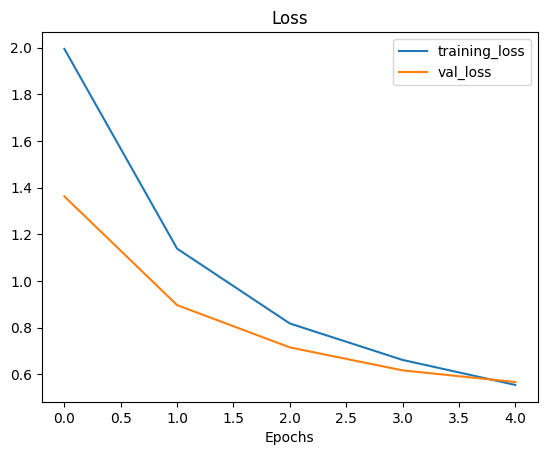

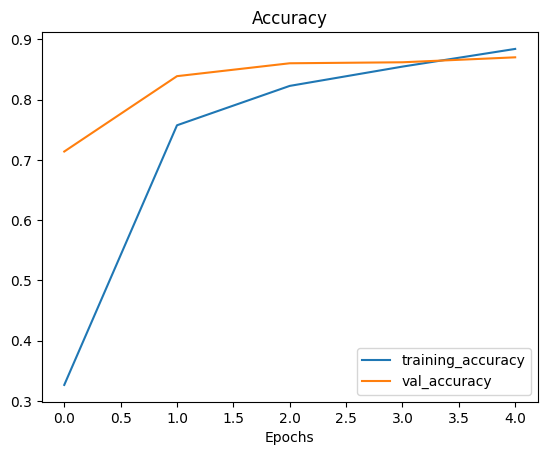

In [57]:
# plot loss curves
plot_loss_curves(history_10_percent)

In [59]:
# creating a another model now
base_model_1=tf.keras.applications.EfficientNetB7(include_top=False)
base_model_1.trainable=False
inputs=tf.keras.layers.Input(shape=(224,224,3))
# x=tf.keras.layers.Rescaling(1./255)(inputs)
x=base_model_1(inputs)
x=tf.keras.layers.GlobalAvgPool2D(name='gloabal_avg_pool')(x)
outputs=tf.keras.layers.Dense(10,activation='softmax')(x)

In [64]:
model_1=tf.keras.Model(inputs,outputs)
model_1.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                optimizer='adam',
                metrics=['accuracy'])
history_model_1_b7=model_1.fit(train_data_10_percent,epochs=5,steps_per_epoch=len(train_data_10_percent),validation_data=test_data,validation_steps=len(test_data),
                               callbacks=[create_tensorboard_callback(dir_name='transfer_learning',experiment_name='efficemt_net_b7')])

Saving TensorBoard log files to: transfer_learning/efficemt_net_b7/20250919-043036
Epoch 1/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 228s 6s/step - accuracy: 0.3536 - loss: 1.9511 - val_accuracy: 0.7868 - val_loss: 0.9898
Epoch 2/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 32s 1s/step - accuracy: 0.8167 - loss: 0.9047 - val_accuracy: 0.8388 - val_loss: 0.6775
Epoch 3/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 27s 1s/step - accuracy: 0.8534 - loss: 0.6326 - val_accuracy: 0.8520 - val_loss: 0.5832
Epoch 4/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 38s 1s/step - accuracy: 0.8886 - loss: 0.5438 - val_accuracy: 0.8588 - val_loss: 0.5310
Epoch 5/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.8845 - loss: 0.4504 - val_accuracy: 0.8572 - val_loss: 0.5011


In [65]:
# Model Evaluation
model_1.evaluate(test_data)

79/79 ━━━━━━━━━━━━━━━━━━━━ 19s 240ms/step - accuracy: 0.8626 - loss: 0.4983


[0.5011487603187561, 0.857200026512146]

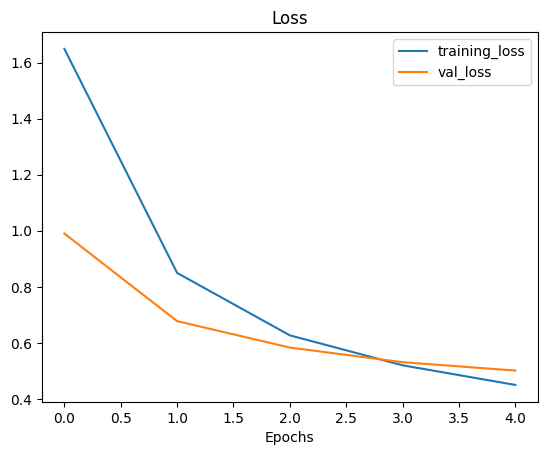

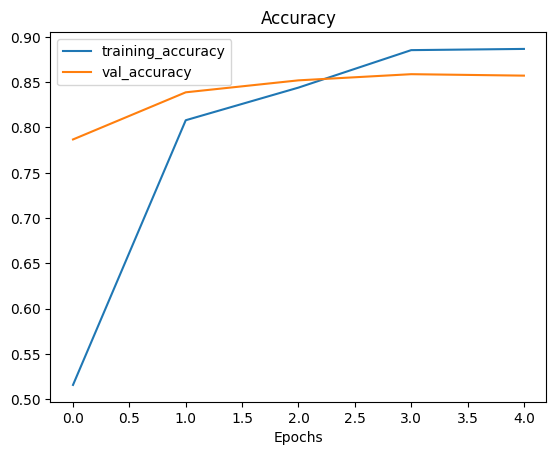

In [66]:
plot_loss_curves(history_model_1_b7)